# Classification of Penguins on the basis of species types

#### Importing the required libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the dataset

In [12]:
df = pd.read_csv('D://penguins.csv')
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [13]:
df.tail()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


#### Analyzing the data

In [14]:
df.shape

(344, 9)

In [15]:
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [16]:
df.shape

(344, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [18]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [22]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


In [24]:
print('Covariance :')
df.cov()

Covariance :


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


In [25]:
print('Correlation :')
df.corr()

Correlation :


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


#### Analyzing the data visually

In [26]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:>

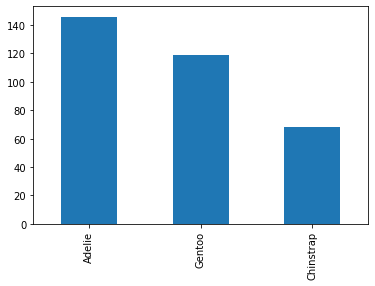

In [30]:
df['species'].value_counts().plot(kind='bar')

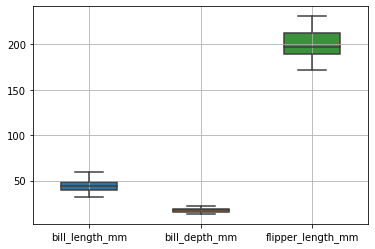

In [40]:
df1 = df[['bill_length_mm','bill_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1,width=0.5,fliersize=5)
plt.grid()

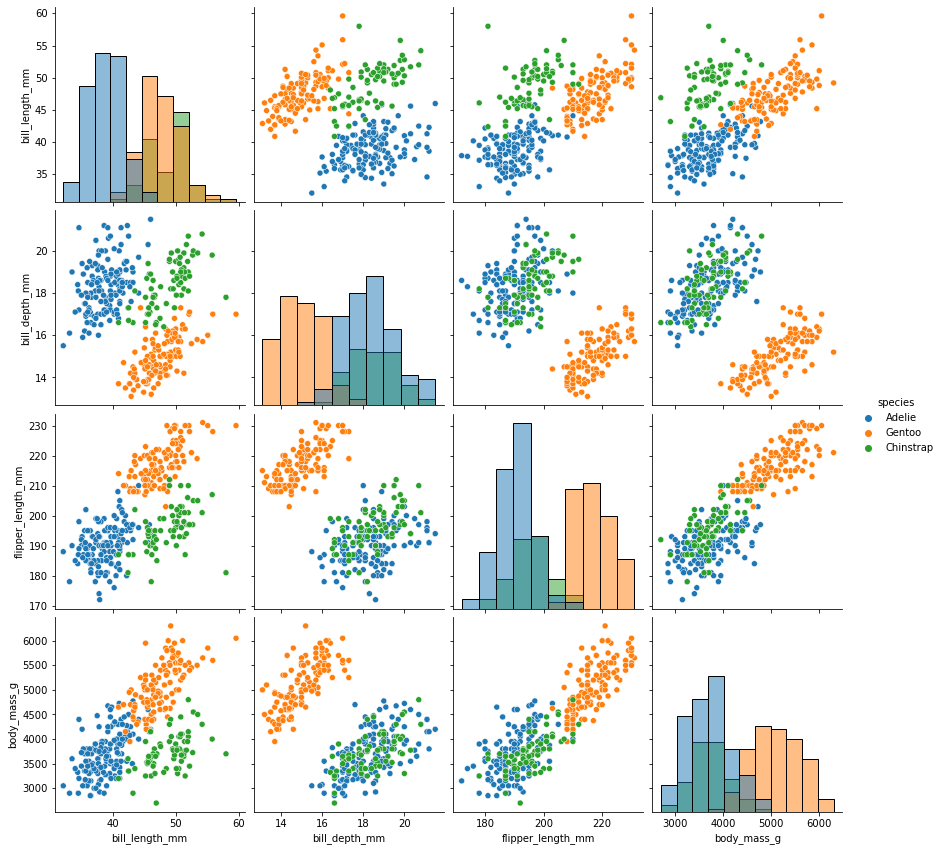

In [46]:
sns.pairplot(data=df,hue='species',height=3,diag_kind='hist')

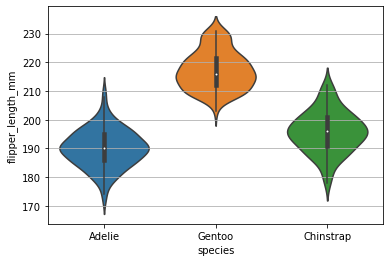

In [56]:
sns.violinplot(x='species',y='flipper_length_mm',data=df,height=8)
plt.grid(axis='y')

#### Feature Engineering

In [32]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
pd.get_dummies(df['sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
4,1,0
5,0,1


In [34]:
sex = pd.get_dummies(df['sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
4,0
5,1


In [35]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [36]:
island = pd.get_dummies(df['island'],drop_first=True)
island.head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


In [37]:
df1 = pd.concat([df,sex,island],axis=1)
df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,male,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1,0,1


In [38]:
df1.drop(['sex','island'],axis=1,inplace=True)
df1.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,male,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2007,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,2007,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,2007,1,0,1


#### Assigning independent variable to 'x' and target variable to 'y'

In [39]:
y = df1['species']
y

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object

In [40]:
y.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [41]:
y = y.map({'Adelie':0,'Chinstrap':1,'Gentoo':2})
y.head()

0    0
1    0
2    0
4    0
5    0
Name: species, dtype: int64

In [42]:
df1.drop(['species','year'],axis=1,inplace=True)
df1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,male,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,1


In [43]:
x = df1

#### Splitting the dataset into training and testing data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [49]:
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (266, 7)
x_test : (67, 7)
y_train : (266,)
y_test : (67,)


#### Training Random Forest Classifier on training set with 'entropy' criteria

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfcls = RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=0)
rfcls.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [51]:
y_pred = rfcls.predict(x_test)
y_pred

array([0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       2], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
confusion_matrix(y_test,y_pred)

array([[27,  1,  0],
       [ 3, 10,  0],
       [ 0,  0, 26]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred)

0.9402985074626866

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.91      0.77      0.83        13
           2       1.00      1.00      1.00        26

    accuracy                           0.94        67
   macro avg       0.94      0.91      0.92        67
weighted avg       0.94      0.94      0.94        67



## For entropy criteria , the model accuracy is 94%

#### Training Random Forest Classifier on training set with 'gini' criteria

In [63]:
rfcls = RandomForestClassifier(n_estimators=7,criterion='gini',random_state=0)
rfcls.fit(x_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

In [64]:
y_pred = rfcls.predict(x_test)
y_pred

array([0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       2], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred)

0.9402985074626866

# So for both the criteria , our model is 94% accurate .